In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import re

%matplotlib inline

In [14]:
df = pd.read_csv('final_data_v2.csv')
df.drop(df.columns[0], axis = 1, inplace = True)

# Basic Feature Engineering

In [15]:
winner_dict = {
    'Red': 1,
    'Blue': 0,
}

bool_dict = {
    True: 1,
    False: 0
  
}

df['Winner'] = df['Winner'].replace(winner_dict)
df['title_bout'] = df['title_bout'].replace(bool_dict)

In [16]:
df['Reach_diff'] = df['R_Reach_cms'] - df['B_Reach_cms']
df['Weight_diff'] = df['R_Weight_lbs'] - df['B_Weight_lbs']
df['Height_diff'] = df['R_Height_cms'] - df['B_Height_cms']

In [389]:
def accuracy(data, att, landed):
    accuracy = []
    for attempt, land in zip(data[att], data[landed]):
        try:
            accuracy.append(land/attempt)
        except:
            accuracy.append(0)
            
    return accuracy



In [18]:
accuracy_metrics = [('B_avg_BODY_att', 'B_avg_BODY_landed'), 
                    ('B_avg_CLINCH_att', 'B_avg_CLINCH_landed'),
                   ('B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed'),
                   ('B_avg_GROUND_att', 'B_avg_GROUND_landed'),
                   ('B_avg_HEAD_att', 'B_avg_HEAD_landed'),
                   ('B_avg_LEG_att', 'B_avg_LEG_landed'),
                   ('B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed'),
                   ('R_avg_BODY_att', 'R_avg_BODY_landed'), 
                    ('R_avg_CLINCH_att', 'R_avg_CLINCH_landed'),
                   ('R_avg_DISTANCE_att', 'R_avg_DISTANCE_landed'),
                   ('R_avg_GROUND_att', 'R_avg_GROUND_landed'),
                   ('R_avg_HEAD_att', 'R_avg_HEAD_landed'),
                   ('R_avg_LEG_att', 'R_avg_LEG_landed'),
                   ('R_avg_TOTAL_STR_att', 'R_avg_TOTAL_STR_landed')]

accuracy_list = []
for item in accuracy_metrics:
    accuracy_list.append(accuracy(df, item[0], item[1]))

In [19]:
accuracy_df = pd.DataFrame(accuracy_list).transpose()

In [20]:
accuracy_df.columns = ['B_avg_BODY_pct', 'B_avg_CLINCH_pct', 'B_avg_DISTANCE_pct', 'B_avg_GROUND_pct',
                      'B_avg_HEAD_pct', 'B_avg_LEG_pct', 'B_avg_TOTAL_STR_pct',
                      'R_avg_BODY_pct', 'R_avg_CLINCH_pct', 'R_avg_DISTANCE_pct', 'R_avg_GROUND_pct',
                      'R_avg_HEAD_pct', 'R_avg_LEG_pct', 'R_avg_TOTAL_STR_pct']

In [21]:
df.shape

(3758, 163)

In [22]:
combined_df = pd.concat([df, accuracy_df], axis = 1)


In [23]:
np.mean(combined_df.Winner)

0.6774880255455029

In [24]:
combined_df.iloc[:, 1:]

,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,...,B_avg_HEAD_pct,B_avg_LEG_pct,B_avg_TOTAL_STR_pct,R_avg_BODY_pct,R_avg_CLINCH_pct,R_avg_DISTANCE_pct,R_avg_GROUND_pct,R_avg_HEAD_pct,R_avg_LEG_pct,R_avg_TOTAL_STR_pct
0,0,5,1.0,0.0,0.0,10.500000,6.916667,6.583333,4.083333,34.166667,...,0.477876,0.851852,0.609032,0.733333,0.720000,0.434018,0.715596,0.438621,0.935484,0.575158
1,0,3,2.0,0.0,0.0,8.600000,6.800000,6.400000,5.400000,26.200000,...,0.323529,0.793103,0.654676,0.733333,0.697143,0.467532,0.658537,0.435223,0.782178,0.610981
2,0,1,2.0,0.0,0.0,8.666667,4.666667,6.666667,5.000000,64.666667,...,0.496774,0.666667,0.590909,0.666667,0.718954,0.407681,0.707317,0.395672,0.787037,0.588138
3,0,3,2.0,0.0,0.0,8.250000,5.250000,1.833333,0.916667,64.500000,...,0.391489,0.821429,0.481522,0.674157,0.533333,0.458462,0.606061,0.422018,0.714286,0.490317
4,0,3,1.0,0.0,0.0,24.333333,16.555556,12.333333,10.444444,108.444444,...,0.371827,0.804196,0.519873,0.794643,0.723529,0.384615,0.648485,0.354223,0.865169,0.522985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,0,1,0.0,1.0,0.0,1.000000,1.000000,0.000000,0.000000,3.000000,...,0.636364,0.000000,0.733333,0.000000,0.000000,0.000000,0.800000,0.800000,0.000000,0.909091
3754,0,1,0.0,1.0,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.333333,0.250000,0.666667,0.809524
3755,1,1,0.0,2.0,0.0,0.500000,0.500000,0.000000,0.000000,5.500000,...,0.555556,1.000000,0.636364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.842105
3756,0,1,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571429


### Scaling the Data

In [25]:
from sklearn import preprocessing

In [26]:
categorical = ['title_bout', 'weight_class_Bantamweight',
              'weight_class_Catch Weight', 'weight_class_Featherweight',
              'weight_class_Flyweight', 'weight_class_Heavyweight',
              'weight_class_Light Heavyweight', 'weight_class_Lightweight',
              'weight_class_Middleweight', 'weight_class_Open Weight',
              'weight_class_Welterweight', "weight_class_Women's Bantamweight",
              "weight_class_Women's Featherweight", "weight_class_Women's Flyweight",
              "weight_class_Women's Strawweight", 'B_Stance_Open Stance',
              'B_Stance_Orthodox', 'B_Stance_Sideways', 'B_Stance_Southpaw',
              'B_Stance_Switch', 'R_Stance_Open Stance', 'R_Stance_Orthodox',
              'R_Stance_Southpaw', 'R_Stance_Switch']

In [27]:
continuous = list(set(combined_df.columns[1:])-set(categorical))

In [28]:
print(len(continuous), len(categorical), combined_df.shape)

152 24 (3758, 177)


In [29]:
df_scaled = preprocessing.scale(combined_df[continuous])
df_scaled = pd.DataFrame(df_scaled, columns = continuous)

In [30]:
df_scaled = pd.concat([df_scaled, combined_df[categorical]], axis = 1)

In [31]:
combined_scaled = pd.concat([df_scaled, combined_df.Winner], axis = 1)

### Train/Validate/Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_testB, y_train, y_testB = train_test_split(df_scaled, combined_df.Winner,
                                                      test_size = .3, random_state = 125, stratify = combined_df.Winner)

In [34]:
X_val, X_test, y_val, y_test = train_test_split(X_testB, y_testB,
                                                      test_size = .5, random_state = 125, stratify = y_testB)

In [35]:
print(X_train.shape, X_val.shape, X_test.shape)

(2630, 176) (564, 176) (564, 176)


# Logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV


In [37]:
logMod = LogisticRegression(max_iter=1000)
logMod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy (30% Test): 0.6933
AUC Score (30% Test): 0.7103


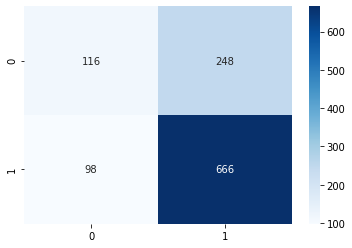

In [38]:
y_predictions = logMod.predict(X_testB)
cm_log = confusion_matrix(y_testB, y_predictions)
sns.heatmap(cm_log, annot = True, fmt = 'd', cmap = 'Blues')

print(f"Accuracy (30% Test): {accuracy_score(y_testB, y_predictions):.4f}")
print(f"AUC Score (30% Test): {roc_auc_score(y_testB, logMod.predict_proba(X_testB)[:,1]):.4f}")

### Regularization & Cross Validation

In [39]:
#Set of lambdas to cross-validate over
alphas = np.logspace(-6, 6, 50)

In [173]:
coef = []

for item in np.logspace(-6, 6, 50):
    logMod_Reg_loop = LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter=100, C = item)
    logMod_Reg_loop.fit(X_train, y_train)
    coef.append(logMod_Reg_loop.coef_)


In [174]:
coefs = []
for item in coef:
    coefs.append(item.flatten())

(2.5118864315095823e-07,
 3981071.7055349695,
 -4.090612865367646,
 15.980742228808921)

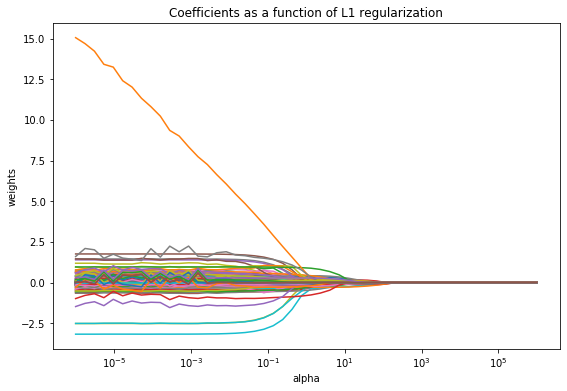

In [175]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs[::-1])
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Coefficients as a function of L1 regularization')
plt.axis('tight')

In [176]:
print(np.where(coefs[::-1][0] == max(coefs[::-1][0])))
print(X_train.columns[161]) 


(array([161], dtype=int64),)
weight_class_Open Weight


Open_Weight class has such a strong impact because in this weight class (35 obs), only Red wins. Actually, due to the 'linear' nature of logistic regression, it might make sense to remove all weight class categories - intuitively, it does not make too much sense to predict a side based on weight class... (maybe something to group by later)

In [52]:
weight_cols = ['weight_class_Bantamweight',
              'weight_class_Catch Weight', 'weight_class_Featherweight',
              'weight_class_Flyweight', 'weight_class_Heavyweight',
              'weight_class_Light Heavyweight', 'weight_class_Lightweight',
              'weight_class_Middleweight', 'weight_class_Open Weight',
              'weight_class_Welterweight', "weight_class_Women's Bantamweight",
              "weight_class_Women's Featherweight", "weight_class_Women's Flyweight",
              "weight_class_Women's Strawweight"]

custom_df = combined_scaled.drop(weight_cols, axis = 1)
custom_df.drop(['Winner'], axis = 1, inplace = True)

In [53]:
X_train, X_testB, y_train, y_testB = train_test_split(custom_df, combined_df.Winner,
                                                      test_size = .3, random_state = 125, stratify = combined_df.Winner)

In [54]:
X_val, X_test, y_val, y_test = train_test_split(X_testB, y_testB,
                                                      test_size = .5, random_state = 125, stratify = y_testB)

In [527]:
coef_2 = []

for item in np.logspace(-6, 6, 50):
    logMod_Reg_loop = LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter=100, C = item)
    logMod_Reg_loop.fit(X_train, y_train)
    coef_2.append(logMod_Reg_loop.coef_)


In [528]:
coefs_2 = []
for item in coef_2:
    coefs_2.append(item.flatten())

(2.5118864315095823e-07,
 3981071.7055349695,
 -3.3914450743907523,
 2.3432164594465394)

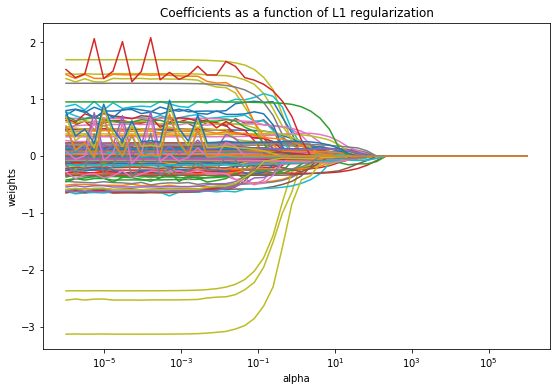

In [544]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs_2[::-1])
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Coefficients as a function of L1 regularization')
plt.axis('tight')

In [539]:
zeroes = []
for item in coefs_2:
    zeroes.append(len(item[item == 0]))


In [523]:
param_grid = {
    'C': np.logspace(-6, 6, 50)
}

In [520]:
#L1 model for feature selection:
logMod_Reg = LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter=100)

logMod_CV = GridSearchCV(logMod_Reg, param_grid, verbose=True)
logMod_CV.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 16.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e...
       6.86648845e+01, 1.20679264e+02, 2.12095089e+02, 3.72759372e+02,
       6.55128557e+02, 1.15139540e+03, 2.02358965e+03, 3.55648031e+03,
       6.25055193e+03, 1.09854114e+04, 1.93069773e+04, 3.39322177e+04,
       5.96362332e+04, 1.04811313e+05, 1.84206997e+05, 3.23745754e+05,
       5.

In [540]:
#Cross Validation picks model with regularization that uses only 30 feature variables
index = np.where(alphas == logMod_CV.best_estimator_.C)
coefs_2[index[0][0]]
zeroes[index[0][0]]
len(custom_df.columns)-1-zeroes[index[0][0]]

73

array([ 0.00000000e+00,  0.00000000e+00, -4.22583226e-02, -1.12411329e-01,
        0.00000000e+00,  0.00000000e+00,  8.10001354e-02,  5.51048277e-02,
        0.00000000e+00, -8.83071497e-04,  0.00000000e+00, -1.04194484e-01,
        3.70045992e-02,  1.41701613e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -7.62010471e-02,
        1.77346598e-02,  0.00000000e+00, -5.38513418e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.96913126e-02,
        0.00000000e+00,  0.00000000e+00,  5.66047185e-02,  2.13351887e-02,
       -5.74055883e-03,  0.00000000e+00,  1.03889643e-02,  2.76792989e-02,
        0.00000000e+00,  0.00000000e+00, -3.32118410e-02, -6.49675128e-02,
        0.00000000e+00, -7.67883776e-02, -4.36825903e-02,  0.00000000e+00,
       -2.42458400e-02,  9.34903959e-03,  4.68618604e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.14489286e-01,
        0.00000000e+00,  

In [541]:
features = np.where(coefs_2[index[0][0]] != 0)
features

(array([  2,   3,   6,   7,   9,  11,  12,  13,  19,  20,  22,  27,  30,
         31,  32,  34,  35,  38,  39,  41,  42,  44,  45,  46,  51,  53,
         57,  62,  65,  66,  68,  70,  72,  73,  75,  76,  80,  83,  87,
         88,  89,  90,  91,  96,  98,  99, 101, 104, 107, 109, 110, 111,
        114, 116, 117, 119, 121, 122, 128, 129, 135, 137, 138, 139, 141,
        143, 144, 146, 147, 148, 150, 152, 154, 160], dtype=int64),)

In [543]:
top_log_features = [item for item in X_train.columns[features]]
top_log_features

['B_avg_SIG_STR_pct',
 'no_of_rounds',
 'R_total_title_bouts',
 'R_Weight_lbs',
 'B_avg_TD_landed',
 'B_avg_opp_TD_att',
 'R_win_by_Submission',
 'B_total_time_fought(seconds)',
 'B_avg_HEAD_landed',
 'B_avg_KD',
 'R_avg_REV',
 'B_avg_opp_SIG_STR_pct',
 'B_win_by_Decision_Split',
 'R_avg_LEG_att',
 'R_avg_CLINCH_pct',
 'B_win_by_TKO_Doctor_Stoppage',
 'R_avg_TOTAL_STR_pct',
 'R_avg_opp_PASS',
 'R_avg_BODY_att',
 'B_avg_DISTANCE_pct',
 'R_avg_opp_REV',
 'B_avg_HEAD_pct',
 'R_Height_cms',
 'R_draw',
 'B_avg_opp_TD_pct',
 'R_current_win_streak',
 'R_avg_TD_pct',
 'R_avg_GROUND_pct',
 'B_avg_opp_REV',
 'R_avg_PASS',
 'R_avg_opp_TOTAL_STR_att',
 'B_losses',
 'R_avg_opp_SUB_ATT',
 'R_age',
 'B_avg_TD_pct',
 'B_avg_opp_PASS',
 'R_avg_BODY_pct',
 'B_current_win_streak',
 'R_avg_SIG_STR_pct',
 'R_total_time_fought(seconds)',
 'B_avg_LEG_pct',
 'B_avg_opp_HEAD_landed',
 'B_avg_GROUND_landed',
 'B_avg_TOTAL_STR_pct',
 'R_avg_GROUND_att',
 'Reach_diff',
 'B_Reach_cms',
 'B_avg_BODY_landed',
 'R_av

Accuracy (30% Test): 0.7039
AUC Score (30% Test): 0.6684


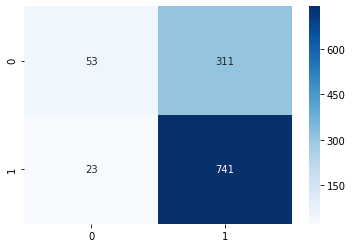

In [204]:
y_predictions = logMod_CV.predict(X_testB)
cm_log = confusion_matrix(y_testB, y_predictions)
sns.heatmap(cm_log, annot = True, fmt = 'd', cmap = 'Blues')

print(f"Accuracy (30% Test): {accuracy_score(y_testB, y_predictions):.4f}")
print(f"AUC Score (30% Test): {roc_auc_score(y_testB, logMod_CV.predict_proba(X_testB)[:,1]):.4f}")

### Imbalance Correction: Over-Sampling

Due to the imbalance of the dataset, this is a decent accuracy, but the model will unfortunatley predict red winner
an inordinate number of times... To settle this, we will use over-sampling

In [59]:
from imblearn.over_sampling import RandomOverSampler, ADASYN
ros = RandomOverSampler(random_state=0)
ada = ADASYN(random_state = 0)

In [241]:
X_train, X_testB, y_train, y_testB = train_test_split(custom_df, combined_df.Winner,
                                                      test_size = .3, random_state = 125, stratify = combined_df.Winner)

In [242]:
#Resample on the training data only!
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [243]:
X_val, X_test, y_val, y_test = train_test_split(X_testB, y_testB,
                                                      test_size = .5, random_state = 125, stratify = y_testB)

In [209]:
param_grid = {
    'C': np.logspace(-6, 6, 50)
}

In [210]:
#Regularized model on oversampled data:
logMod_Reg = LogisticRegression(penalty = 'l1', solver = 'liblinear', max_iter=100)

logMod_CV_Over = GridSearchCV(logMod_Reg, param_grid, verbose=True)
logMod_CV_Over.fit(X_resampled, y_resampled)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 20.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e...
       6.86648845e+01, 1.20679264e+02, 2.12095089e+02, 3.72759372e+02,
       6.55128557e+02, 1.15139540e+03, 2.02358965e+03, 3.55648031e+03,
       6.25055193e+03, 1.09854114e+04, 1.93069773e+04, 3.39322177e+04,
       5.96362332e+04, 1.04811313e+05, 1.84206997e+05, 3.23745754e+05,
       5.

Accuracy (30% Test): 0.6392
AUC Score (30% Test): 0.6684


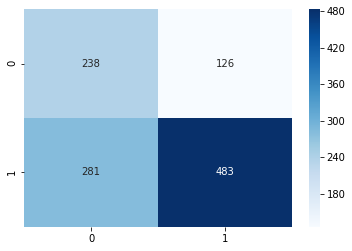

In [211]:
y_predictions = logMod_CV_Over.predict(X_testB)
cm_log = confusion_matrix(y_testB, y_predictions)
sns.heatmap(cm_log, annot = True, fmt = 'd', cmap = 'Blues')

print(f"Accuracy (30% Test): {accuracy_score(y_testB, y_predictions):.4f}")
print(f"AUC Score (30% Test): {roc_auc_score(y_testB, logMod_CV.predict_proba(X_testB)[:,1]):.4f}")

In [212]:
#L2 Model on oversampled data:
logMod_Reg_Over = LogisticRegression(max_iter=1000)
logMod_Reg_Over.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy (30% Test): 0.6436
AUC Score (30% Test): 0.7071


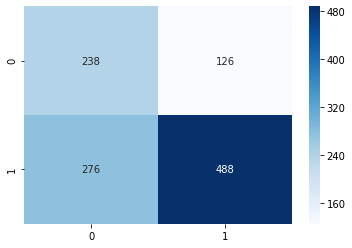

In [214]:
y_predictions = logMod_Reg_Over.predict(X_testB)
cm_log = confusion_matrix(y_testB, y_predictions)
sns.heatmap(cm_log, annot = True, fmt = 'd', cmap = 'Blues')

print(f"Accuracy (30% Test): {accuracy_score(y_testB, y_predictions):.4f}")
print(f"AUC Score (30% Test): {roc_auc_score(y_testB, logMod_Reg_Over.predict_proba(X_testB)[:,1]):.4f}")

In [217]:
#Rerun base model without including weight class

In [282]:
logMod = LogisticRegression(max_iter=1000)
logMod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy (30% Test): 0.7012
AUC Score (30% Test): 0.7143


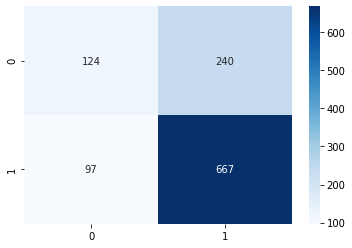

In [283]:
y_predictions = logMod.predict(X_testB)
cm_log = confusion_matrix(y_testB, y_predictions)
sns.heatmap(cm_log, annot = True, fmt = 'd', cmap = 'Blues')

print(f"Accuracy (30% Test): {accuracy_score(y_testB, y_predictions):.4f}")
print(f"AUC Score (30% Test): {roc_auc_score(y_testB, logMod.predict_proba(X_testB)[:,1]):.4f}")

A more sophisticated resampling method

In [60]:
#Resample on the training data only!
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)


In [61]:
#L2 Model on oversampled data:
logMod_Reg_ada = LogisticRegression(max_iter=1000)
logMod_Reg_ada.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy (30% Test): 0.6445
AUC Score (30% Test): 0.7070


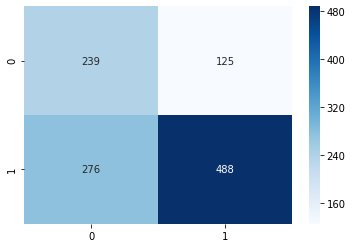

In [62]:
y_predictions = logMod_Reg_ada.predict(X_testB)
cm_log = confusion_matrix(y_testB, y_predictions)
sns.heatmap(cm_log, annot = True, fmt = 'd', cmap = 'Blues')

print(f"Accuracy (30% Test): {accuracy_score(y_testB, y_predictions):.4f}")
print(f"AUC Score (30% Test): {roc_auc_score(y_testB, logMod_Reg_ada.predict_proba(X_testB)[:,1]):.4f}")

# Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, combined_df.Winner,
                                                      test_size = .3, random_state = 125, stratify = combined_df.Winner)

In [82]:
param_grid = {
    'max_features': np.arange(50, 170, 10)
}

In [84]:
rfMod = RandomForestClassifier()
gridRF = GridSearchCV(rfMod, param_grid, verbose = True, scoring = 'roc_auc')

In [85]:
gridRF.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  8.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [86]:
gridRF.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=50,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy (30% Test): 0.6950
AUC Score (30% Test): 0.6803


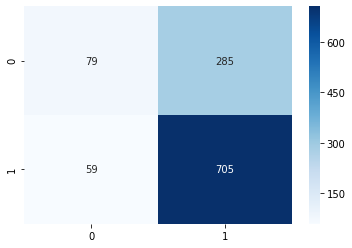

In [87]:
y_predictions = gridRF.predict(X_test)
cm_log = confusion_matrix(y_test, y_predictions)
sns.heatmap(cm_log, annot = True, fmt = 'd', cmap = 'Blues')

print(f"Accuracy (30% Test): {accuracy_score(y_testB, y_predictions):.4f}")
print(f"AUC Score (30% Test): {roc_auc_score(y_testB, gridRF.predict_proba(X_test)[:,1]):.4f}")

In [88]:
feat_imps = {}
for i, imp in enumerate(gridRF.best_estimator_.feature_importances_):
    feat_imps[X_train.columns[i]] = imp

In [89]:
sorted_imp_feats = (sorted(feat_imps.items(), key = lambda x: x[1], reverse=True))
sorted_imp_feats

[('R_avg_opp_SIG_STR_landed', 0.020597684641881657),
 ('R_total_time_fought(seconds)', 0.017949119458770008),
 ('R_age', 0.01729291316045017),
 ('R_avg_opp_HEAD_landed', 0.015890793577420202),
 ('B_age', 0.013752436684052538),
 ('R_avg_opp_SIG_STR_pct', 0.013104055442081874),
 ('B_avg_SIG_STR_landed', 0.011504127999781979),
 ('B_avg_opp_SIG_STR_pct', 0.010689807854831219),
 ('R_avg_opp_DISTANCE_landed', 0.010688674139731775),
 ('B_avg_TD_att', 0.010553538499070642),
 ('R_avg_TD_pct', 0.010305970098367619),
 ('B_total_time_fought(seconds)', 0.009937635705999748),
 ('R_avg_opp_TOTAL_STR_landed', 0.009932195530231242),
 ('B_avg_SIG_STR_att', 0.009867294474119643),
 ('R_avg_TOTAL_STR_landed', 0.009654851761958804),
 ('B_avg_TOTAL_STR_pct', 0.009651313927504322),
 ('B_avg_HEAD_landed', 0.009511921932168906),
 ('R_avg_BODY_pct', 0.009411361768982109),
 ('R_avg_CLINCH_pct', 0.009280905723702564),
 ('B_avg_opp_TD_pct', 0.00916594344707332),
 ('R_avg_opp_PASS', 0.009127330310995286),
 ('R_avg_D

In [545]:
rf_df = combined_scaled[top_log_features]

In [546]:
X_trainR, X_testR, y_trainR, y_testR = train_test_split(rf_df, combined_scaled.Winner, test_size = .3, random_state = 125)

In [550]:
param_grid = {
    'max_features': np.arange(1, 73, 2)
}

gridRF_small = GridSearchCV(rfMod, param_grid, verbose = True, scoring = 'roc_auc')

In [551]:
gridRF_small.fit(X_trainR, y_trainR)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  8.8min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [552]:
gridRF_small.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=47,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy (30% Test): 0.6339
AUC Score (30% Test): 0.5369


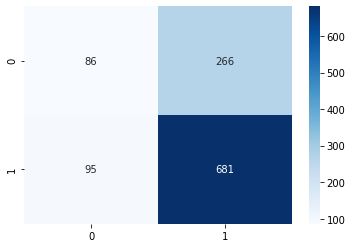

In [553]:
y_predictions = gridRF_small.predict(X_testR)
cm_log = confusion_matrix(y_testR, y_predictions)
sns.heatmap(cm_log, annot = True, fmt = 'd', cmap = 'Blues')

print(f"Accuracy (30% Test): {accuracy_score(y_testB, y_predictions):.4f}")
print(f"AUC Score (30% Test): {roc_auc_score(y_testB, gridRF_small.predict_proba(X_testR)[:,1]):.4f}")

### Resampled Random Forest

In [264]:
from imblearn.pipeline import Pipeline

In [265]:
model = Pipeline([
        ('sampling', ADASYN()),
        ('classification', RandomForestClassifier())
    ])

In [266]:
parameters = {"classification__max_features": np.arange(50, 170, 10)}

rf_resample = GridSearchCV(model, parameters, verbose = True, scoring = 'roc_auc')

In [267]:
rf_resample.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 14.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sampling',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('classification',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                       

Accuracy (30% Test): 0.6853
AUC Score (30% Test): 0.6726


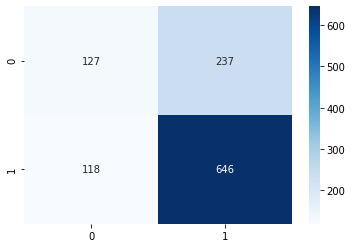

In [269]:
y_predictions = rf_resample.predict(X_testB)
cm_log = confusion_matrix(y_testB, y_predictions)
sns.heatmap(cm_log, annot = True, fmt = 'd', cmap = 'Blues')

print(f"Accuracy (30% Test): {accuracy_score(y_testB, y_predictions):.4f}")
print(f"AUC Score (30% Test): {roc_auc_score(y_testB, rf_resample.predict_proba(X_testB)[:,1]):.4f}")

# Gradient Boosting

In [98]:
from sklearn.ensemble import AdaBoostClassifier

In [273]:
parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    }

In [274]:
clf = GridSearchCV(AdaBoostClassifier(), parameters, cv=10, n_jobs=-1, scoring = 'roc_auc', verbose=True)

In [275]:
clf.fit(X_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   11.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=True)

In [276]:
clf.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.15,
                   n_estimators=50, random_state=None)

Accuracy (30% Test): 0.6862
AUC Score (30% Test): 0.6933


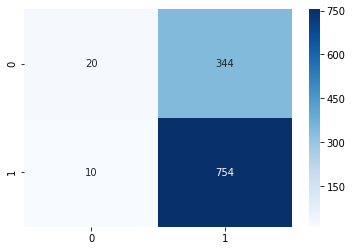

In [278]:
y_predictions = clf.predict(X_testB)
cm_log = confusion_matrix(y_testB, y_predictions)
sns.heatmap(cm_log, annot = True, fmt = 'd', cmap = 'Blues')

print(f"Accuracy (30% Test): {accuracy_score(y_testB, y_predictions):.4f}")
print(f"AUC Score (30% Test): {roc_auc_score(y_testB, clf.predict_proba(X_testB)[:,1]):.4f}")

In [247]:
model = Pipeline([
        ('sampling', ADASYN()),
        ('classification', AdaBoostClassifier())
    ])

In [248]:
parameters = {"classification__learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2]}

clf_resample = GridSearchCV(model, parameters, verbose = True)


In [249]:
clf_resample.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sampling',
                                        ADASYN(n_jobs=None, n_neighbors=5,
                                               random_state=None,
                                               sampling_strategy='auto')),
                                       ('classification',
                                        AdaBoostClassifier(algorithm='SAMME.R',
                                                           base_estimator=None,
                                                           learning_rate=1.0,
                                                           n_estimators=50,
                                                           random_state=None))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'classification__learning_rate': [0.01, 0.025, 0.05,
                         

Accuracy (30% Test): 0.6383
AUC Score (30% Test): 0.6853


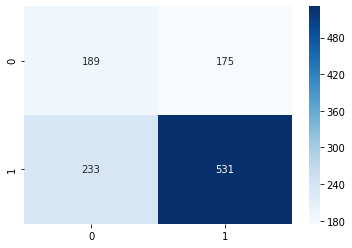

In [260]:
y_predictions = clf_resample.predict(X_testB)
cm_log = confusion_matrix(y_testB, y_predictions)
sns.heatmap(cm_log, annot = True, fmt = 'd', cmap = 'Blues')

print(f"Accuracy (30% Test): {accuracy_score(y_testB, y_predictions):.4f}")
print(f"AUC Score (30% Test): {roc_auc_score(y_testB, clf_resample.predict_proba(X_testB)[:,1]):.4f}")

# Blended Model

In [235]:
X_train, X_testB, y_train, y_testB = train_test_split(custom_df, combined_df.Winner,
                                                      test_size = .3, random_state = 125, stratify = combined_df.Winner)

In [236]:
X_val, X_test, y_val, y_test = train_test_split(X_testB, y_testB,
                                                      test_size = .5, random_state = 125, stratify = y_testB)

In [237]:
logEnsemble = LogisticRegression()

In [305]:
y_prediction_log = pd.Series(logMod.predict_proba(X_val)[:,1].flatten())
y_prediction_rf = pd.Series(rf_resample.predict_proba(X_val)[:,1].flatten())
y_prediction_gb = pd.Series(clf.predict_proba(X_val)[:,1].flatten())

In [312]:
blended_df = pd.concat([y_prediction_log, y_prediction_rf, y_prediction_gb], axis = 1)

In [316]:
blended_val = y_val.reset_index(drop = True)
blended_df.columns = ['Log', "RF", "GB"]
blended_df

,Log,RF,GB
0,0.504262,0.63,0.533051
1,0.718694,0.59,0.547655
2,0.757143,0.57,0.526714
3,0.831277,0.77,0.727501
4,0.796206,0.75,0.527389
...,...,...,...
559,0.722745,0.74,0.536940
560,0.894532,0.59,0.549052
561,0.681156,0.37,0.507021
562,0.768061,0.78,0.539903


In [317]:
blendedMod = LogisticRegression()

In [318]:
blendedMod.fit(blended_df, blended_val)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [319]:
X_test_prediction_log = pd.Series(logMod.predict_proba(X_test)[:,1].flatten())
X_test_prediction_rf = pd.Series(rf_resample.predict_proba(X_test)[:,1].flatten())
X_test_prediction_gb = pd.Series(clf.predict_proba(X_test)[:,1].flatten())

In [320]:
blended_X_test = pd.concat([X_test_prediction_log, X_test_prediction_rf, X_test_prediction_gb], axis = 1)

Accuracy (15% Test): 0.6826
AUC Score (15% Test): 0.7141


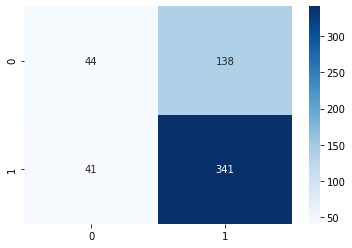

In [561]:
y_predictions = blendedMod.predict(blended_X_test)
cm_log = confusion_matrix(y_test.reset_index(drop = True), y_predictions)
sns.heatmap(cm_log, annot = True, fmt = 'd', cmap = 'Blues')

print(f"Accuracy (15% Test): {accuracy_score(y_test, y_predictions):.4f}")
print(f"AUC Score (15% Test): {roc_auc_score(y_test, blendedMod.predict_proba(blended_X_test)[:,1]):.4f}")

# Bootstrap the Blended Model

In [594]:
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score

1128

In [565]:
blended_data = pd.concat([blended_X_test, y_test.reset_index(drop = True)], axis = 1)
blended_data.columns = ['Log', 'RF', 'GB', 'Winner']

In [578]:
bootstrap_data = []
for i in np.arange(0, 1000, 1):
    bootstrap_data.append(resample(blended_data, n_samples = y_test.shape[0]))

In [596]:
bootstrap_accuracies = []
aucs = []
for item in bootstrap_data:
    X = item.iloc[:, 0:3]
    y = item.iloc[:, 3]
    boot_prediction = blendedMod.predict(X)
    boot_proba = blendedMod.predict_proba(X)
    bootstrap_accuracies.append(accuracy_score(boot_prediction, y))
    aucs.append(roc_auc_score(y, boot_proba[:,1]))

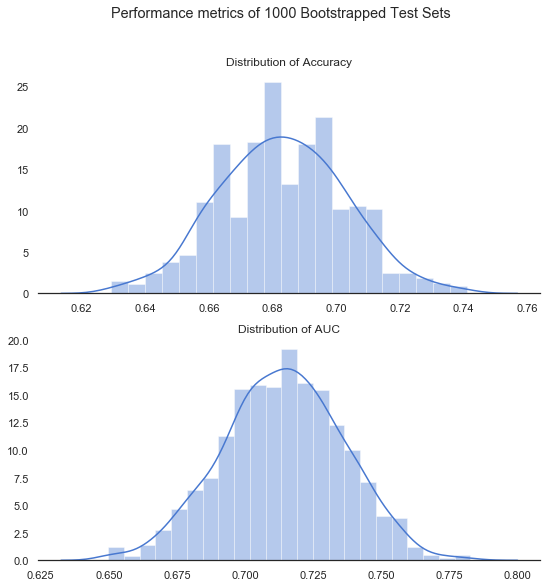

In [621]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(9, 9))
sns.despine(left=True)

f.suptitle('Performance metrics of 1000 Bootstrapped Test Sets')
axes[0].set_title("Distribution of Accuracy")
sns.distplot(bootstrap_accuracies, ax=axes[0])

axes[1].set_title('Distribution of AUC')
sns.distplot(aucs, ax= axes[1])


In [593]:
np.mean(bootstrap_accuracies)

0.683131205673759

# New fights from 12/7 & 12/14:

In [494]:
new_fights = pd.read_csv('new_fights_final.csv')

In [495]:
new_fights = new_fights.iloc[0:17, :]

In [496]:
new_fights.drop(new_fights.columns[0] ,axis = 1,inplace = True)

In [497]:
new_fights.shape

(17, 160)

In [498]:
new_fights['Winner'] = new_fights['Winner'].replace(winner_dict)
new_fights['title_bout'] = new_fights['title_bout'].replace(bool_dict)

In [499]:
new_fights['Reach_diff'] = new_fights['R_Reach_cms'] - new_fights['B_Reach_cms']
new_fights['Weight_diff'] = new_fights['R_Weight_lbs'] - new_fights['B_Weight_lbs']
new_fights['Height_diff'] = new_fights['R_Height_cms'] - new_fights['B_Height_cms']

In [500]:
new_accuracy_list = []
for item in accuracy_metrics:
    new_accuracy_list.append(accuracy(new_fights, item[0], item[1]))

In [501]:
new_accuracy_df = pd.DataFrame(new_accuracy_list).transpose()

In [502]:
new_accuracy_df.columns = ['B_avg_BODY_pct', 'B_avg_CLINCH_pct', 'B_avg_DISTANCE_pct', 'B_avg_GROUND_pct',
                      'B_avg_HEAD_pct', 'B_avg_LEG_pct', 'B_avg_TOTAL_STR_pct',
                      'R_avg_BODY_pct', 'R_avg_CLINCH_pct', 'R_avg_DISTANCE_pct', 'R_avg_GROUND_pct',
                      'R_avg_HEAD_pct', 'R_avg_LEG_pct', 'R_avg_TOTAL_STR_pct']

In [503]:
new_combined_df = pd.concat([new_fights, new_accuracy_df], axis = 1)

In [504]:
new_df_scaled = preprocessing.scale(new_combined_df[continuous])
new_df_scaled = pd.DataFrame(new_df_scaled, columns = continuous)

In [505]:
new_df_scaled = pd.concat([new_df_scaled, new_combined_df[categorical]], axis = 1)

In [506]:
new_combined_scaled = pd.concat([new_df_scaled, new_combined_df.Winner], axis = 1)

In [507]:
new_combined_scaled.shape

(17, 177)

In [508]:
new_combined_scaled.drop(weight_cols, axis = 1, inplace = True)
actual = new_combined_scaled['Winner']
new_combined_scaled.drop(['Winner'], axis = 1, inplace = True)

In [509]:
new_combined_scaled.shape

(17, 162)

In [510]:
new_prediction_log = pd.Series(logMod.predict_proba(new_combined_scaled)[:,1].flatten())
new_prediction_rf = pd.Series(rf_resample.predict_proba(new_combined_scaled)[:,1].flatten())
new_prediction_gb = pd.Series(clf.predict_proba(new_combined_scaled)[:,1].flatten())

In [511]:
new_test = pd.concat([new_prediction_log, new_prediction_rf, new_prediction_gb], axis = 1)

In [512]:
new_preds = blendedMod.predict(new_test)

In [514]:
new_preds

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [515]:
new_accuracy = sum(new_preds)/16

In [516]:
new_accuracy

0.9375